In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
#functions to predict and check accuray
def AccuracyScore(model, x_valid, y_valid):
    y_pred = model.predict(x_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    return accuracy


In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
train_dataa = pd.read_csv('train.csv')
valid_data = pd.read_csv('valid.csv')
test_data = pd.read_csv('test.csv')


In [ ]:
test_label1=test_data.copy()
id=test_label1["ID"]

In [ ]:
import pandas as pd

# Load the original CSV file

# Split the data into training (80%) and validation (20%) sets
train_data = pd.DataFrame(train_dataa.sample(frac=0.8, random_state=42))
valid_data = pd.DataFrame(train_dataa.drop(train_data.index))

In [ ]:
X_train = train_data.drop(columns=["label_1", "label_2", "label_3", "label_4"])
y_test_train = train_data["label_1"]

X_valid = valid_data.drop(columns=["label_1", "label_2", "label_3", "label_4"])
Y_valid = valid_data["label_1"]

X_test = valid_data.drop(columns=["label_1", "label_2", "label_3", "label_4"])
Y_test = valid_data["label_1"]


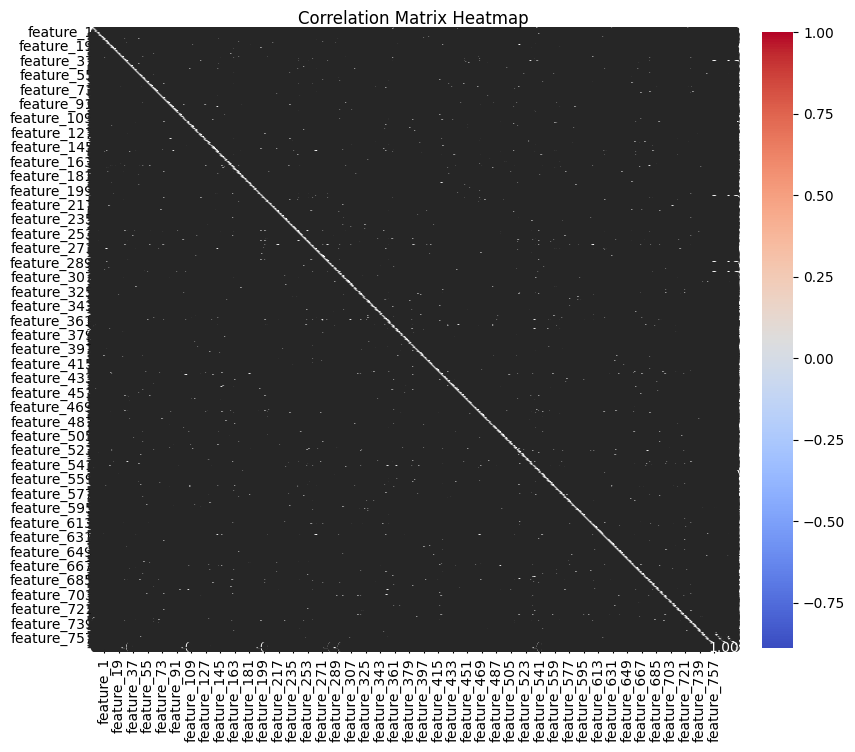

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for X_train
corr_matrix = X_train.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
#Calculate the correlation in X_train
threshold = 0.9
correlated_cols = correlation(X_train, threshold)
print(correlated_cols)
#Remove correlated columns from X_train, X_valid, and X_test
X_train = X_train.drop(columns=correlated_cols)
X_valid = X_valid.drop(columns=correlated_cols)
X_test = X_test.drop(columns=correlated_cols)


{'feature_410', 'feature_363', 'feature_581', 'feature_722', 'feature_615', 'feature_210', 'feature_364', 'feature_178', 'feature_572', 'feature_725', 'feature_126', 'feature_710', 'feature_9', 'feature_399', 'feature_530', 'feature_461', 'feature_548', 'feature_603', 'feature_24', 'feature_168', 'feature_312', 'feature_247', 'feature_148', 'feature_422', 'feature_357', 'feature_436', 'feature_695', 'feature_638', 'feature_703', 'feature_610', 'feature_272', 'feature_396', 'feature_639', 'feature_480', 'feature_88', 'feature_371', 'feature_420', 'feature_617', 'feature_699', 'feature_199', 'feature_745', 'feature_427', 'feature_571', 'feature_718', 'feature_394', 'feature_539', 'feature_713', 'feature_419', 'feature_673', 'feature_569', 'feature_493', 'feature_253', 'feature_408', 'feature_281', 'feature_244', 'feature_503', 'feature_265', 'feature_575', 'feature_373', 'feature_311', 'feature_741', 'feature_481', 'feature_282', 'feature_366', 'feature_450', 'feature_424', 'feature_421'

In [ ]:
train_data.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
12655   0.028003   0.020000   0.073626  -0.038619  -0.012431   0.015338   
17039   0.141467   0.129636   0.255030  -0.136047   0.048461  -0.067307   
2281    0.080463   0.201545   0.213811  -0.220092  -0.003620  -0.019892   
3378    0.015992   0.075709   0.143414  -0.061354  -0.031767   0.014683   
10463   0.017567   0.063938   0.108566  -0.040975  -0.019857   0.000204   

       feature_7  feature_8  feature_9  feature_10  ...  feature_763  \
12655  -0.040395  -0.014398  -0.034248    0.045096  ...     0.025824   
17039   0.028388  -0.044903  -0.311317    0.070959  ...    -0.168399   
2281   -0.042576  -0.028403  -0.221612    0.154010  ...    -0.142369   
3378   -0.034306  -0.011161  -0.067169    0.056574  ...    -0.058363   
10463  -0.032629  -0.027925  -0.062147    0.033134  ...    -0.016473   

       feature_764  feature_765  feature_766  feature_767  feature_768  \
12655    -0.028305    -0.014092    -0.001135     0.013746     0.054492   
17039    -0.041076    -0.025874     0.150906    -0.010729     0.135479   
2281     -0.068767    -0.052691     0.137955    -0.085186     0.084800   
3378     -0.029318    -0.024892     0.028870    -0.035928     0.036377   
10463    -0.002710    -0.029409     0.017445     0.002242     0.042705   

       label_1  label_2  label_3  label_4  
12655       10     36.0        1        6  
17039       22     33.0        1        6  
2281        11     33.0        1        6  
3378        46     30.0        1        6  
10463       54     27.0        1        6  

[5 rows x 772 columns]

In [ ]:
valid_data.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
9    0.139341   0.099962   0.209152  -0.113535  -0.011091   0.034769   
11   0.025385   0.056871   0.140374  -0.031876  -0.034300  -0.022637   
13   0.029278   0.062839   0.111446  -0.077354  -0.005586   0.005090   
16   0.098025   0.092596   0.187439  -0.156295  -0.035483   0.021340   
24  -0.003133   0.049142   0.091541  -0.064046   0.003624   0.010462   

    feature_7  feature_8  feature_9  feature_10  ...  feature_763  \
9   -0.020635  -0.042567  -0.164749    0.107070  ...    -0.033845   
11  -0.087643   0.002970  -0.185915    0.096053  ...    -0.076885   
13  -0.026134  -0.016416  -0.081438    0.048918  ...    -0.016105   
16  -0.031401  -0.022840  -0.132564    0.113394  ...    -0.052474   
24  -0.037174  -0.007898  -0.070643    0.019142  ...     0.011247   

    feature_764  feature_765  feature_766  feature_767  feature_768  label_1  \
9     -0.088502     0.000503     0.016320    -0.023586     0.127941       45   
11    -0.072322    -0.020326     0.020173    -0.033454     0.076214       45   
13    -0.081400    -0.030019     0.044297    -0.000110     0.077406       45   
16    -0.040848    -0.022965     0.045246    -0.021316     0.134457       45   
24    -0.040133    -0.005071     0.003471    -0.020589     0.053170       45   

    label_2  label_3  label_4  
9       NaN        1        6  
11      NaN        1        6  
13      NaN        1        6  
16      NaN        1        6  
24      NaN        1        6  

[5 rows x 772 columns]

In [ ]:
#create separate dataframes for each label
x_train = {}
x_valid = {}
y_train = {}
y_valid = {}
x_test = {}
y_test = {}
Labels = ["label_1", "label_2", "label_3", "label_4"]
Features = np.array(train_data.drop(columns=["label_1", "label_2", "label_3", "label_4"]).columns)

for label in Labels:
  tr_data = train_data[train_data["label_2"].notna()] if label == "label_2" else train_data
  vl_data = valid_data[valid_data["label_2"].notna()] if label == "label_2" else valid_data

  #standardize data
  scaler = StandardScaler()

  x_train[label] = pd.DataFrame(scaler.fit_transform(tr_data.drop(Labels, axis=1)), columns=Features)
  y_train[label] = tr_data[label]
  x_valid[label] = pd.DataFrame(scaler.transform(vl_data.drop(Labels, axis=1)), columns=Features)
  y_valid[label] = vl_data[label]
  x_test[label] = pd.DataFrame(scaler.transform(test_data.drop(["ID"], axis=1)), columns=Features)


Removing Correlated features

In [ ]:
for label in Labels:
    # Calculate the correlation matrix for the x_train[label]
    corr_features = correlation(x_train[label], threshold=0.9)  # Adjust the threshold as needed

    # Remove correlated features from x_train[label]
    x_train[label] = x_train[label].drop(columns=corr_features)
    x_valid[label] = x_valid[label].drop(columns=corr_features)
    x_test[label] = x_test[label].drop(columns=corr_features)

<h4>Label 1</h4>

In [ ]:
###### Initial accuracy with svm_model
svm_model_1 = SVC(kernel="linear")
svm_model_1.fit(x_train["label_1"], y_train["label_1"])
accuracy_label_1 = AccuracyScore(svm_model_1, x_valid["label_1"], y_valid["label_1"])


Accuracy: 91.50%


In [ ]:
#Apply PCA -Feature Extraction
pca_label_1 = PCA(n_components=0.99, svd_solver="full")
pca_label_1.fit(x_train["label_1"])
x_train_label_1_PCA = pd.DataFrame(pca_label_1.transform(x_train["label_1"]))
print(x_train_label_1_PCA.shape)
x_valid_label_1_PCA = pd.DataFrame(pca_label_1.transform(x_valid["label_1"]))


(22816, 383)


In [ ]:
svm_model_1.fit(x_train_label_1_PCA, y_train["label_1"])
acc_pca = AccuracyScore(svm_model_1, x_valid_label_1_PCA, y_valid["label_1"])

Accuracy: 90.78%


In [ ]:
param_dist = {
    'C': [100, 10, 1],  # Continuous uniform distribution for 'C'
    'kernel': ['rbf', 'linear'],  # Categorical distribution for 'kernel'
    'gamma': [0.001, 0.01, 0.1],  # Continuous uniform distribution for 'gamma'
    'degree': [2, 3, 4, 5],  # Polynomial degree for 'poly' kernel
    'coef0': [0.0, 1.0, 2.0],  # Independent term in the kernel function
}

# Create a RandomizedSearchCV object
random_search_label_1 = RandomizedSearchCV(svm_model_1, param_dist, cv=5, scoring='accuracy',
                              n_iter=5, random_state=42, verbose=3, n_jobs=-1)
random_search_label_1.fit(x_train_label_1_PCA, y_train['label_1'])
print("Best Hyperparameters:", random_search_label_1.best_params_)

# Get the best hyperparameters and the corresponding model
best_model_label_1 = random_search_label_1.best_estimator_


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[CV 5/5] END C=1, coef0=2.0, degree=3, gamma=0.01, kernel=linear;, score=0.890 total time= 1.5min
[CV 4/5] END C=1, coef0=2.0, degree=3, gamma=0.01, kernel=linear;, score=0.911 total time= 1.5min
[CV 3/5] END C=1, coef0=2.0, degree=5, gamma=0.01, kernel=linear;, score=0.897 total time= 1.5min
[CV 2/5] END C=1, coef0=2.0, degree=3, gamma=0.01, kernel=linear;, score=0.901 total time= 1.6min
[CV 1/5] END C=1, coef0=2.0, degree=5, gamma=0.01, kernel=linear;, score=0.901 total time= 1.6min
[CV 1/5] END C=1, coef0=2.0, degree=3, gamma=0.01, kernel=linear;, score=0.901 total time= 1.6min
[CV 3/5] END C=1, coef0=2.0, degree=3, gamma=0.01, kernel=linear;, score=0.897 total time= 1.6min
[CV 2/5] END C=1, coef0=2.0, degree=5, gamma=0.01, kernel=linear;, score=0.901 total time= 1.6min
[CV 4/5] END C=1, coef0=2.0, degree=5, gamma=0.01, kernel=linear;, score=0.911 total time= 1.3min
[CV 5/5] END C=1, coef0=2.0, degree=5, gamma=0.01, kernel=linear;, score=0.890 total time= 1.3min
[CV 1/5] END C=1, co

In [ ]:
# Evaluate the best model on validation set
acc_best_model_label_1 = best_model_label_1.score(x_valid_label_1_PCA, y_valid["label_1"])

print("Validation Accuracy with Best Model:", acc_best_model_label_1)


Validation Accuracy with Best Model: 0.9319775596072931


In [ ]:
svm_model_1_tuned = SVC(kernel="rbf", C=100, gamma=0.001,degree=5,coef0=2.0)
svm_model_1_tuned.fit(x_train_label_1_PCA, y_train["label_1"])
accuracy_label_1 = AccuracyScore(svm_model_1_tuned, x_valid_label_1_PCA, y_valid["label_1"])

Accuracy: 93.08%


In [ ]:
#Predict on test set with tuned model and PCA
y_pred_label_1 = svm_model_1_tuned.predict(pca_label_1.transform(x_test["label_1"]))


In [ ]:
prediction_df=pd.DataFrame({"ID": id, "label_1": y_pred_label_1})
prediction_df

ID  label_1
0      1       26
1      2       18
2      3       16
3      4        7
4      5       58
..   ...      ...
739  740       35
740  741       35
741  742       54
742  743       38
743  744       21

[744 rows x 2 columns]

<h4>Label 2</h4>

In [ ]:
svm_model_2 = SVC()
svm_model_2.fit(x_train["label_2"], y_train["label_2"])
acc = AccuracyScore(
    svm_model_2, x_valid["label_2"], y_valid["label_2"])


Accuracy: 81.80%


In [ ]:
pca_label_2 = PCA(n_components=0.99, svd_solver="full")
pca_label_2.fit(x_train["label_2"])
x_train_label2_PCA = pd.DataFrame(pca_label_2.transform(x_train["label_2"]))
print(x_train_label2_PCA.shape)
x_valid_label2_PCA = pd.DataFrame(pca_label_2.transform(x_valid["label_2"]))


(22429, 382)


In [ ]:
svm_model_2.fit(x_train_label2_PCA, y_train["label_2"])
acc = AccuracyScore(svm_model_2, x_valid_label2_PCA, y_valid["label_2"])


Accuracy: 81.06%


In [ ]:
param_grid = {
    'C': [100,10],  # Continuous uniform distribution for 'C'
    'kernel': ['rbf', 'linear'],  # Categorical distribution for 'kernel'
    'gamma': [0.001, 0.01, 0.1, 1],  # Continuous uniform distribution for 'gamma'
    'degree': [4, 5],  # Polynomial degree for 'poly' kernel
    'coef0': [1.0, 2.0]  # Independent term in the kernel function
}
random_search_label_2 = RandomizedSearchCV(svm_model_2, param_grid, cv=5, scoring='accuracy',
                              n_iter=5, random_state=42, verbose=3, n_jobs=-1)
random_search_label_2.fit(x_train_label2_PCA, y_train['label_2'])
print("Best Hyperparameters:", random_search_label_2.best_params_)

# Get the best hyperparameters and the corresponding model
best_model_label_2 = random_search_label_2.best_estimator_


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[CV 3/5] END C=10, coef0=2.0, degree=5, gamma=0.01, kernel=rbf;, score=0.711 total time= 5.0min
[CV 2/5] END C=10, coef0=2.0, degree=5, gamma=0.01, kernel=rbf;, score=0.709 total time= 5.0min
[CV 1/5] END C=10, coef0=2.0, degree=5, gamma=0.01, kernel=rbf;, score=0.706 total time= 5.3min
[CV 2/5] END C=10, coef0=2.0, degree=4, gamma=0.1, kernel=rbf;, score=0.170 total time= 5.5min
[CV 4/5] END C=10, coef0=2.0, degree=4, gamma=0.1, kernel=rbf;, score=0.171 total time= 5.9min
[CV 1/5] END C=10, coef0=2.0, degree=4, gamma=0.1, kernel=rbf;, score=0.170 total time= 6.0min
[CV 5/5] END C=10, coef0=2.0, degree=4, gamma=0.1, kernel=rbf;, score=0.171 total time= 6.3min
[CV 3/5] END C=10, coef0=2.0, degree=4, gamma=0.1, kernel=rbf;, score=0.170 total time= 6.3min
[CV 1/5] END C=100, coef0=1.0, degree=4, gamma=0.001, kernel=rbf;, score=0.868 total time= 1.7min
[CV 2/5] END C=100, coef0=1.0, degree=4, gamma=0.001, kernel=rbf;, score=0.876 total time= 1.9min
[CV 3/5] END C=100, coef0=1.0, degree=4, 

In [ ]:
svm_model_2_tuned = SVC(kernel="rbf", C=100, gamma=0.001,degree=4)
svm_model_2_tuned.fit(x_train["label_2"], y_train["label_2"])
acc = AccuracyScore(svm_model_2_tuned, x_valid["label_2"], y_valid["label_2"])


Accuracy: 89.84%


In [ ]:
svm_model_2_tuned_2 = SVC(kernel="rbf", C=100, gamma=0.001,degree=4)
svm_model_2_tuned_2.fit(x_train_label2_PCA, y_train["label_2"])

SVC(C=100, degree=4, gamma=0.001)

In [ ]:
##Check accuracy with best model on validation set with PCA
acc_best_model_label_2 = AccuracyScore(svm_model_2_tuned_2, x_valid_label2_PCA, y_valid["label_2"])

Accuracy: 89.16%


In [ ]:
#Predict on test set with tuned model without PCA
y_pred_label_2 = svm_model_2_tuned.predict(x_test["label_2"])
y_pred_label_df_2=pd.DataFrame(y_pred_label_2, columns=['label_2'])

In [ ]:
merge_df=pd.concat([prediction_df, y_pred_label_df_2],axis=1)

In [ ]:
merge_df

ID  label_1  label_2
0      1       26     22.0
1      2       18     25.0
2      3       16     30.0
3      4        7     25.0
4      5       58     29.0
..   ...      ...      ...
739  740       46     30.0
740  741       35     24.0
741  742       54     27.0
742  743       38     32.0
743  744       51     31.0

[744 rows x 3 columns]

<h4>Label 3</h4>

In [ ]:
svm_model_3 = SVC(kernel="linear")
svm_model_3.fit(x_train["label_3"], y_train["label_3"])
acc = AccuracyScore(
    svm_model_3, x_valid["label_3"], y_valid["label_3"])

Accuracy: 99.21%


In [ ]:
#Apply PCA - Feature Extraction
pca_label_3 = PCA(n_components=0.95, svd_solver="full")
pca_label_3.fit(x_train["label_3"])
x_train_label_3_PCA = pd.DataFrame(pca_label_3.transform(x_train["label_3"]))
print(x_train_label_3_PCA.shape)
x_valid_label_3_PCA = pd.DataFrame(pca_label_3.transform(x_valid["label_3"]))

(22816, 157)


In [ ]:
svm_model_3.fit(x_train_label_3_PCA, y_train["label_3"])
acc = AccuracyScore(svm_model_3, x_valid_label_3_PCA, y_valid["label_3"])

Accuracy: 98.81%


In [ ]:
param_grid = {
    'C': [100,0.1],  # Continuous uniform distribution for 'C'
    'kernel': ['rbf', 'linear'],  # Categorical distribution for 'kernel'
    'gamma': [0.001,1],  # Continuous uniform distribution for 'gamma'
    'degree': [2, 3, 4, 5],  # Polynomial degree for 'poly' kernel
    'coef0': [1.0, 2.0]  # Independent term in the kernel function
}

In [ ]:
random_search_label_3 = RandomizedSearchCV(svm_model_3, param_grid, cv=5, scoring='accuracy',
                              n_iter=5, random_state=42, verbose=3, n_jobs=-1)
random_search_label_3.fit(x_train_label_3_PCA, y_train['label_3'])
print("Best Hyperparameters:", random_search_label_3.best_params_)

# Get the best hyperparameters and the corresponding model
best_model_label_3 = random_search_label_3.best_estimator_


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[CV 2/5] END C=0.1, coef0=2.0, degree=3, gamma=0.001, kernel=rbf;, score=0.968 total time=  36.5s
[CV 4/5] END C=0.1, coef0=2.0, degree=3, gamma=0.001, kernel=rbf;, score=0.969 total time=  36.9s
[CV 1/5] END C=0.1, coef0=2.0, degree=3, gamma=0.001, kernel=rbf;, score=0.972 total time=  36.9s
[CV 5/5] END C=0.1, coef0=2.0, degree=3, gamma=0.001, kernel=rbf;, score=0.966 total time=  36.9s
[CV 3/5] END C=0.1, coef0=2.0, degree=3, gamma=0.001, kernel=rbf;, score=0.970 total time=  36.9s
[CV 1/5] END C=100, coef0=1.0, degree=2, gamma=0.001, kernel=rbf;, score=0.992 total time=   6.6s
[CV 2/5] END C=100, coef0=1.0, degree=2, gamma=0.001, kernel=rbf;, score=0.992 total time=   6.7s
[CV 3/5] END C=100, coef0=1.0, degree=2, gamma=0.001, kernel=rbf;, score=0.994 total time=   6.9s
[CV 4/5] END C=100, coef0=1.0, degree=2, gamma=0.001, kernel=rbf;, score=0.991 total time=   6.3s
[CV 5/5] END C=100, coef0=1.0, degree=2, gamma=0.001, kernel=rbf;, score=0.992 total time=   6.3s
[CV 1/5] END C=0.1, 

In [ ]:
best_model_label_3 = random_search_label_3.best_estimator_
acc_best_model_label_3 = AccuracyScore(best_model_label_3, x_valid_label_3_PCA, y_valid["label_3"])

Accuracy: 99.39%


In [ ]:
##Check accuracy with tuned model on validation set without PCA
svm_model_3_tuned = SVC(kernel='linear', C=0.1, gamma=0.01,degree=4,coef0=0.5)
svm_model_3_tuned.fit(x_train["label_3"], y_train["label_3"])
acc = AccuracyScore(svm_model_3_tuned, x_valid["label_3"], y_valid["label_3"])

Accuracy: 99.19%


In [ ]:
#Predict on test set with tuned model without PCA
y_pred_label_3 = svm_model_3_tuned.predict(x_test["label_3"])
y_pred_label_df_3=pd.DataFrame(y_pred_label_3, columns=['label_3'])

In [ ]:
merge_df=pd.concat([merge_df, y_pred_label_df_3],axis=1)

In [ ]:
merge_df

ID  label_1  label_2  label_3
0      1       26     22.0        0
1      2       18     25.0        1
2      3       16     30.0        1
3      4        7     25.0        1
4      5       58     29.0        0
..   ...      ...      ...      ...
739  740       46     30.0        1
740  741       35     24.0        1
741  742       54     27.0        1
742  743       38     32.0        1
743  744       51     31.0        1

[744 rows x 4 columns]

<h4>Label 4</h4>

In [ ]:
svm_model_4 = SVC()
svm_model_4.fit(x_train["label_4"], y_train["label_4"])
acc = AccuracyScore(svm_model_4, x_valid["label_4"], y_valid["label_4"])

Accuracy: 89.53%


In [ ]:
pca_label_4 = PCA(n_components=0.95, svd_solver="full")
pca_label_4.fit(x_train["label_4"])
x_train_label_4_PCA = pd.DataFrame(pca_label_4.transform(x_train["label_4"]))
print(x_train_label_4_PCA.shape)
x_valid_label_4_PCA = pd.DataFrame(pca_label_4.transform(x_valid["label_4"]))

(22816, 157)


In [ ]:
svm_model_4.fit(x_train_label_4_PCA, y_train["label_4"])
acc = AccuracyScore(svm_model_4, x_valid_label_4_PCA, y_valid["label_4"])


Accuracy: 87.24%


In [ ]:
param_grid = {
    'C': [100, 10, 1],  # Continuous uniform distribution for 'C'
    'kernel': ['rbf', 'linear'],  # Categorical distribution for 'kernel'
    'gamma': [0.001, 0.01, 0.1],  # Continuous uniform distribution for 'gamma'
    'degree': [2, 3, 4, 5],  # Polynomial degree for 'poly' kernel
    'coef0': [0.0, 1.0, 2.0],  # Independent term in the kernel function
    'class_weight': [None, 'balanced']
}


In [ ]:
random_search_label_4 = RandomizedSearchCV(svm_model_4, param_grid, cv=5, scoring='accuracy',
                              n_iter=5, random_state=42, verbose=3, n_jobs=-1)
random_search_label_4.fit(x_train_label_4_PCA, y_train['label_4'])
print("Best Hyperparameters:", random_search_label_4.best_params_)

# Get the best hyperparameters and the corresponding model
best_model_label_4 = random_search_label_4.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[CV 5/5] END C=1, class_weight=balanced, coef0=2.0, degree=4, gamma=0.1, kernel=rbf;, score=0.700 total time=24.1min
[CV 2/5] END C=1, class_weight=balanced, coef0=2.0, degree=4, gamma=0.1, kernel=rbf;, score=0.700 total time=24.2min
[CV 4/5] END C=1, class_weight=balanced, coef0=2.0, degree=4, gamma=0.1, kernel=rbf;, score=0.701 total time=24.3min
[CV 3/5] END C=1, class_weight=balanced, coef0=2.0, degree=4, gamma=0.1, kernel=rbf;, score=0.700 total time=24.4min
[CV 1/5] END C=1, class_weight=balanced, coef0=2.0, degree=4, gamma=0.1, kernel=rbf;, score=0.700 total time=24.6min
[CV 1/5] END C=10, class_weight=None, coef0=1.0, degree=4, gamma=0.001, kernel=rbf;, score=0.930 total time=  23.5s
[CV 2/5] END C=10, class_weight=None, coef0=1.0, degree=4, gamma=0.001, kernel=rbf;, score=0.930 total time=  26.9s
[CV 3/5] END C=10, class_weight=None, coef0=1.0, degree=4, gamma=0.001, kernel=rbf;, score=0.937 total time=  26.2s
[CV 4/5] END C=10, class_weight=None, coef0=1.0, degree=4, gamma=0.

In [ ]:


acc_best_model_label_4 = AccuracyScore(best_model_label_4, x_valid_label_4_PCA, y_valid["label_4"])

Accuracy: 94.37%


In [ ]:
##Check accuracy with tuned model on validation set with PCA
svm_model_4_tuned = SVC(kernel='rbf', C=100, gamma=0.001,degree=3,coef0=1.0)
svm_model_4_tuned.fit(x_train_label_4_PCA, y_train["label_4"])
acc = AccuracyScore(svm_model_4_tuned, x_valid_label_4_PCA, y_valid["label_4"])


Accuracy: 94.37%


In [ ]:
##Check accuracy with tuned model on validation set with PCA
svm_model_4_tuned = SVC(kernel='rbf', C=10, gamma=0.001,degree=4,coef0=1.0)
svm_model_4_tuned.fit(x_train_label_4_PCA, y_train["label_4"])
acc = AccuracyScore(svm_model_4_tuned, x_valid_label_4_PCA, y_valid["label_4"])


Accuracy: 93.83%


In [ ]:
#Predict on test set with tuned model with PCA
y_pred_label_4 = svm_model_4_tuned.predict(pca_label_4.transform(x_test["label_4"]))
y_pred_label_df_4=pd.DataFrame(y_pred_label_4, columns=['label_3'])

In [ ]:
merge_df=pd.concat([merge_df, y_pred_label_df_3],axis=1)

In [ ]:
merge_df.to_csv("solutions.csv", index=False)